In [1]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [2]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index)+1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [3]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = model[word] if word in model else np.zeros(embedding_dim)

    return embedding_matrix

In [ ]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [4]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [5]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [6]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

In [ ]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Rnn, "rnn_glove",60)

Epoch: 15/15
Validation Loss: 0.0687
Validation Macro F1: 0.7175
Training Macro F1: 0.8173


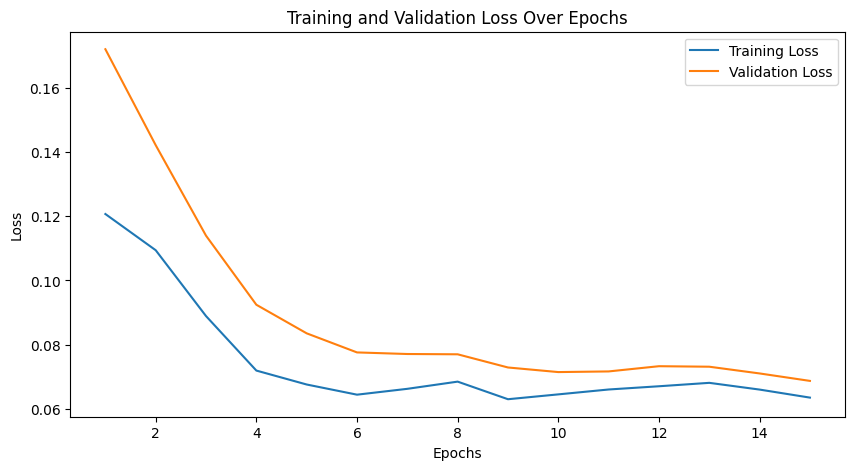

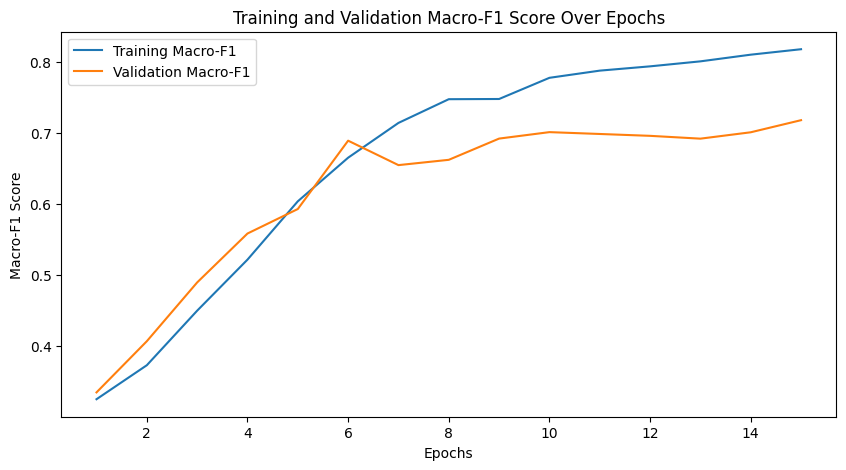

Final Test Accuracy: 0.9718
Final Test Macro F1: 0.6913


In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Rnn, "rnn_word2vec",60)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Rnn, "rnn_fasttext",60)

Epoch: 15/15
Validation Loss: 0.0768
Validation Macro F1: 0.7265
Training Macro F1: 0.7143


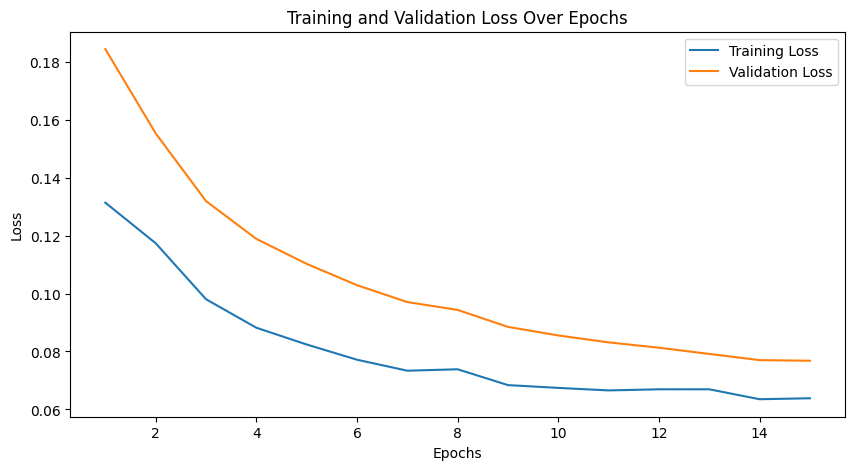

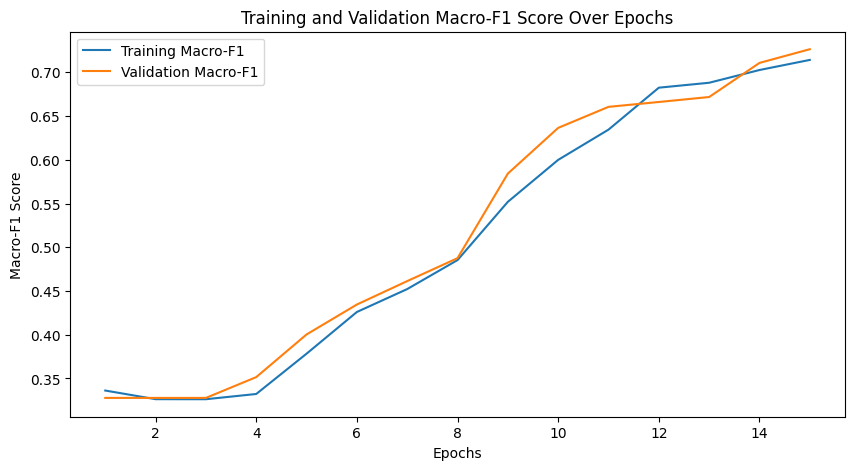

Final Test Accuracy: 0.9651
Final Test Macro F1: 0.6647


In [ ]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Lstm, "lstm_glove",60)

Epoch: 15/15
Validation Loss: 0.0688
Validation Macro F1: 0.7359
Training Macro F1: 0.8072


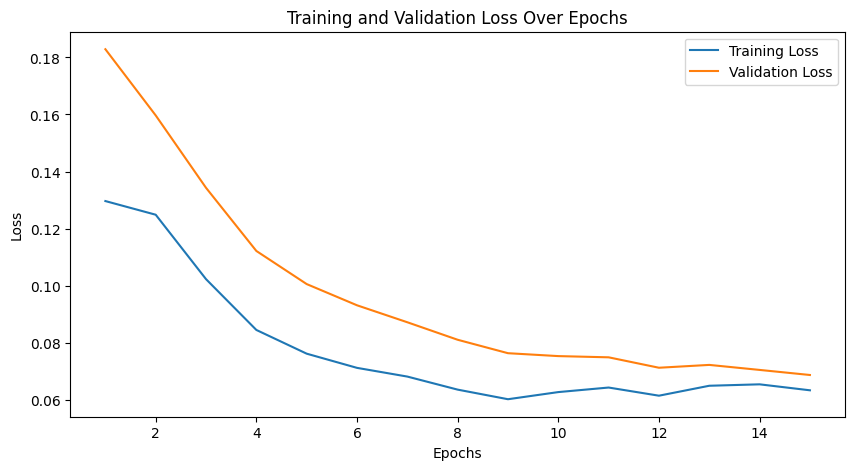

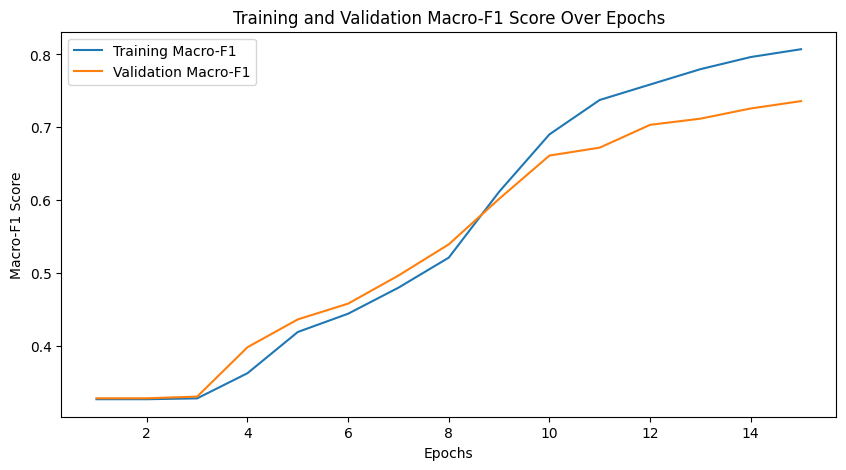

Final Test Accuracy: 0.9717
Final Test Macro F1: 0.6932


In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Lstm, "lstm_word2vec",60)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",60)

Epoch: 15/15
Validation Loss: 0.0753
Validation Macro F1: 0.6929
Training Macro F1: 0.7135


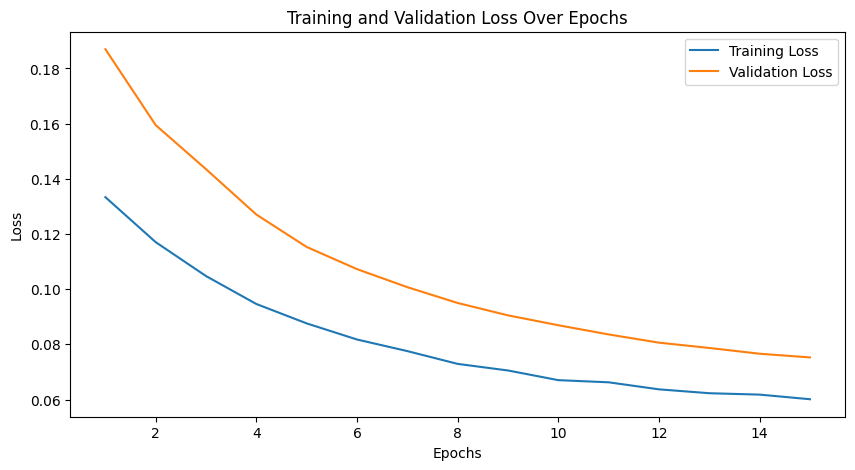

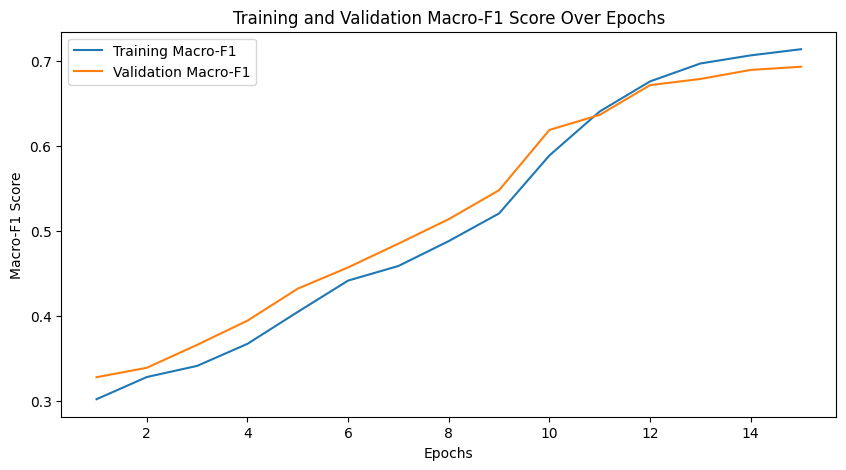

Final Test Accuracy: 0.9660
Final Test Macro F1: 0.6506


In [ ]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Gru, "gru_glove",60)

Epoch: 15/15
Validation Loss: 0.0660
Validation Macro F1: 0.7414
Training Macro F1: 0.8093


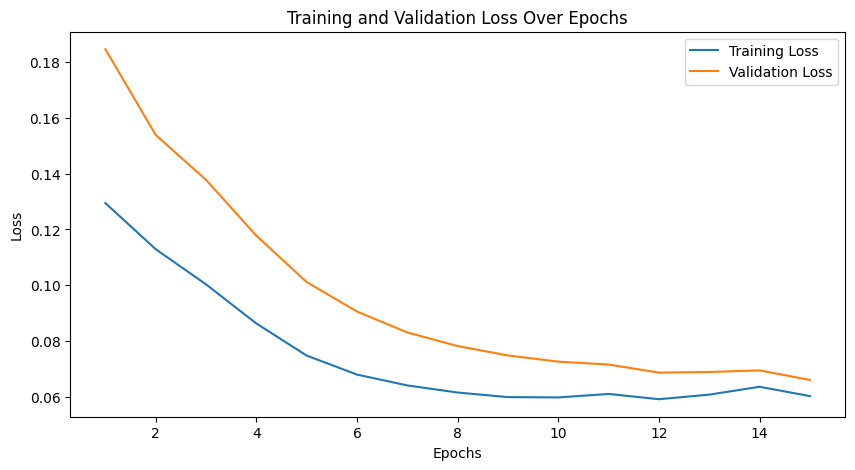

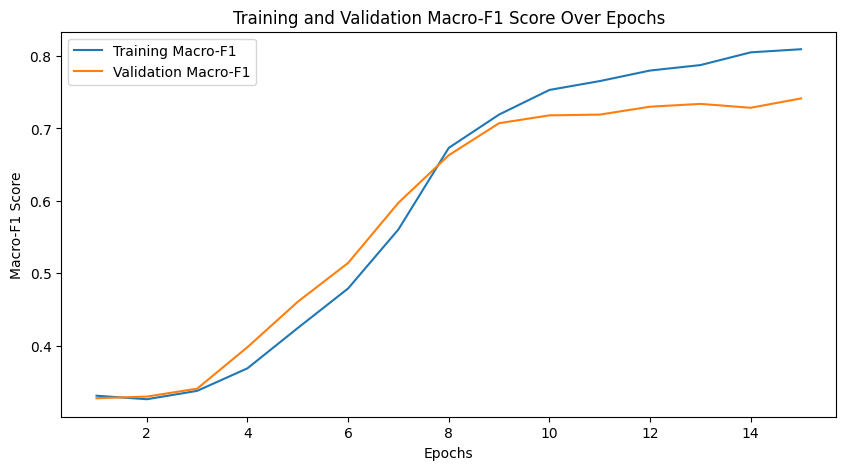

Final Test Accuracy: 0.9732
Final Test Macro F1: 0.7213


In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Gru, "gru_word2vec",60)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",60)